In [29]:
import os
import numpy as np
import dill
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from pprint import pprint

# search the biggest difference

In [38]:
exp_dir = Path('data/search_learn')
diff = dict()
for fn in os.listdir(exp_dir):
    with open(Path(exp_dir, fn), 'rb') as f:
        results = dill.load(f)
        results = [res for res in results if len(res[4]['out']) == 0]
        if not results: continue
        mc_returns = np.stack([res[0] for res in results]).mean(0)
        rqmc_returns = np.stack([res[1] for res in results]).mean(0)
        #full_returns = np.stack([res[2] for res in results]).mean(0)
        #optimal_returns = np.stack([res[3] for res in results]).mean(0)
        diff_val = (rqmc_returns - mc_returns).max()
        diff[fn] = diff_val
pprint(diff)

(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
{'10-0.0-140-0.01': 5.721500821586837,
 '10-0.0-400-0.001': 1.5245342548176382,
 '10-0.1-100-0.01': 17.446996013551093,
 '10-0.1-160-0.003': 10.925745809886934,
 '10-0.1-180-0.006': 6.69723567258557,
 '10-0.5-100-0.003': 2.735801835

# Compare Learning

In [36]:
with open('data/search_learn_2/5', 'rb') as f:
    full_results = dill.load(f)
    print('num of results:', len(full_results))
    print('num of outs:')
    print('mc:', len([res for res in full_results if 'mc' in res[1]['out']]))
    print('rqmc:', len([res for res in full_results if 'rqmc' in res[1]['out']]))
    print('full:', len([res for res in full_results if 'full' in res[1]['out']]))
    print('optimal:', len([res for res in full_results if 'optimal' in res[1]['out']]))
    results = [res[0] for res in full_results if len(res[1]['out']) == 0]
    print('number of learning results:', len(results))
    if len(results) == 0:
        results = [res[0] for res in full_results if len(res[1]['out']) == 1] # only mc is out
        print('number of learning results:', len(results))

num of results: 200
num of outs:
mc: 200
rqmc: 200
full: 0
optimal: 0
number of learning results: 0
number of learning results: 0


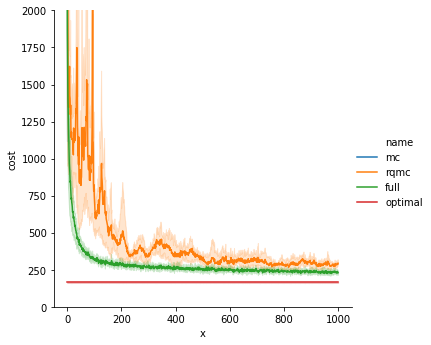

In [35]:
data = pd.concat([
    pd.concat([
        pd.DataFrame({
            'name': name,
            'cost': -val[0],
            'x': np.arange(len(val[0]))
        })
        for name, val in res.items()
    ])
    for res in results
])


# mc_data = pd.concat([
#     pd.DataFrame(
#         {'name': 'mc',
#          'return': results[i][0][:x_lim],
#          'x': np.arange(len(results[i][0][:x_lim]))}) for i in range(len(results))
# ])

# rqmc_data = pd.concat([
#     pd.DataFrame(
#         {'name': 'rqmc',
#          'return': results[i][1][:x_lim],
#          'x': np.arange(len(results[i][1][:x_lim]))}) for i in range(len(results))
# ])

# full_data = pd.concat([
#     pd.DataFrame(
#         {'name': 'full',
#          'return': results[i][2][:x_lim],
#          'x': np.arange(len(results[i][2][:x_lim]))}) for i in range(len(results))
# ])

# optimal_data = pd.concat([
#     pd.DataFrame(
#         {'name': 'optimal',
#          'return': results[i][3][:x_lim],
#          'x': np.arange(len(results[i][3][:x_lim]))}) for i in range(len(results))
# ])

#data = pd.concat([mc_data, rqmc_data, full_data, optimal_data])
plot = sns.relplot(x='x', y='cost', kind='line', hue='name', data=data)
plot.set(ylim=(0, 2000))

# Compare Gradident

In [5]:
with open('data/compare_grad-10-100000', 'rb') as f:
    results = dill.load(f)
    results = [res for res in results if not np.isnan(res[1][-1])]
    print(len(results))
    print('rqmc wins in {}/{}'.format(np.sum([res[0][-1] > res[1][-1] for res in results]), len(results)))

200
rqmc wins in 200/200


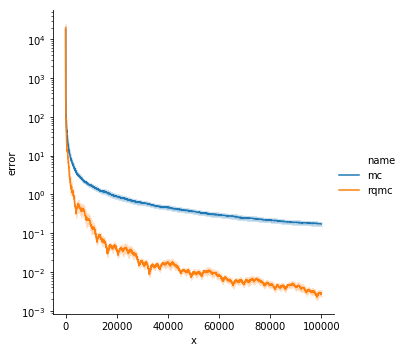

In [7]:
used_results = results[:50]

mc_data = pd.concat([
    pd.DataFrame(
        {'name': 'mc',
         'error': used_results[i][0],
         'x': np.arange(len(used_results[i][0]))}) for i in range(len(used_results))
])

rqmc_data = pd.concat([
    pd.DataFrame(
        {'name': 'rqmc',
         'error': used_results[i][1],
         'x': np.arange(len(used_results[i][1]))}) for i in range(len(used_results))
])

data = pd.concat([mc_data, rqmc_data])
plot = sns.relplot(x='x', y='error', kind='line', hue='name', data=data)
plot.set(yscale='log')

# Comparing over seeds (Return)

In [12]:
# load data
with open('comparing_over_seeds/200_seeds_2500_trajs.pkl', 'rb') as f:
    results = dill.load(f)
    results = [res for res in results if not np.isnan(res[1][-1])] # cannot use res[1][-1] == np.nan
    print(len(results))

FileNotFoundError: [Errno 2] No such file or directory: 'comparing_over_noises/0.0.pkl'

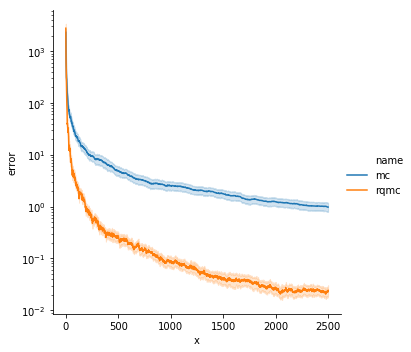

In [44]:
mc_data = pd.concat([
    pd.DataFrame(
        {'name': 'mc',
         'error': results[i][0],
         'x': np.arange(len(results[i][0]))}) for i in range(len(results))
])

rqmc_data = pd.concat([
    pd.DataFrame(
        {'name': 'rqmc',
         'error': results[i][1],
         'x': np.arange(len(results[i][1]))}) for i in range(len(results))
])

data = pd.concat([mc_data, rqmc_data])
plot = sns.relplot(x='x', y='error', kind='line', hue='name', data=data)
plot.set(yscale='log')

# One seed

In [4]:
#with open('one_seed/H-1.num_traj-2500.0.pkl', 'rb') as f:
#with open('one_seed/compare_0_100k.pkl', 'rb') as f:
with open('one_seed/H-5.num_traj-30000.1.pkl', 'rb') as f:
    results = dill.load(f)

mc_data = pd.DataFrame({
    'name': 'mc',
    'error': results['mc_errors'],
    'x': np.arange(len(results['mc_errors']))
})
rqmc_data = pd.DataFrame({
    'name': 'rqmc',
    'error': results['rqmc_errors'],
    'x': np.arange(len(results['rqmc_errors']))
})
data = pd.concat([mc_data, rqmc_data])

[[ 2.50000000e-01 -1.29651459e-17 -2.55744868e-17  1.36398873e-17
   2.54800645e-17]
 [-1.29651459e-17  2.50000000e-01 -4.84018955e-19 -2.13918922e-17
  -5.13255094e-18]
 [-2.55744868e-17 -4.84018955e-19  2.50000000e-01 -4.31612115e-18
   6.75873130e-18]
 [ 1.36398873e-17 -2.13918922e-17 -4.31612115e-18  2.50000000e-01
  -1.33592116e-17]
 [ 2.54800645e-17 -5.13255094e-18  6.75873130e-18 -1.33592116e-17
   2.50000000e-01]]


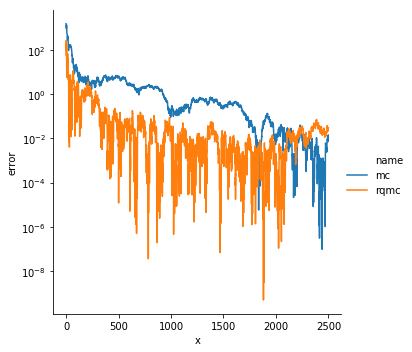

In [11]:
#plot = sns.relplot(x='x', y='error', hue='name', kind='line', data=data)
#plot.set(yscale='log')
from main import compare_samples

data = compare_samples(50, 2500, noise_scale=0.5, show_fig=True)

# Debug

In [11]:
import torch
from torch.optim import SGD

model = torch.nn.Linear(10, 10)
optimizer = SGD(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-3)

model.bias.requires_grad = False

for name, param in model.named_parameters():
    print(name, param)

x = torch.randn(5, 10)
g = torch.randn(5, 10)

loss = torch.nn.functional.mse_loss(x, g)

optimizer.zero_grad()
loss.backward()
optimizer.step()

for name, param in model.named_parameters():
    print(name, param)

weight Parameter containing:
tensor([[-0.1934, -0.2758, -0.1425, -0.1616, -0.3068, -0.0743,  0.2823,  0.1410,
          0.0495,  0.2070],
        [ 0.1081, -0.0497, -0.0402,  0.1652, -0.1893, -0.0879,  0.1987, -0.0668,
          0.0091,  0.2850],
        [-0.0523, -0.0862,  0.1250, -0.2178,  0.0176,  0.2996,  0.0648,  0.0271,
          0.0990, -0.1839],
        [ 0.1761, -0.2515,  0.2376,  0.0828, -0.0556,  0.2213,  0.2378,  0.2849,
          0.1870, -0.0220],
        [ 0.1420, -0.2498,  0.1630,  0.0941,  0.2684,  0.1991, -0.1635,  0.1753,
          0.2791,  0.1415],
        [ 0.0059, -0.2648,  0.2324,  0.0913, -0.0097,  0.0066,  0.0373,  0.0405,
         -0.1373, -0.0539],
        [ 0.2882,  0.0784,  0.0264, -0.1116,  0.2229, -0.1447, -0.1129, -0.0699,
          0.2869,  0.0132],
        [-0.2146,  0.1866, -0.1010,  0.0016, -0.1902, -0.0917, -0.1621,  0.0455,
          0.2752, -0.0336],
        [ 0.2609, -0.3011,  0.3098, -0.0103,  0.0185,  0.1859, -0.2402, -0.2952,
         -0.1301, 

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [29]:
import torch
import numpy as np

a = torch.Tensor([0, 1, 2, -np.inf])
print(a == float('-inf'))

tensor([0, 0, 0, 1], dtype=torch.uint8)
